## top, b jet reco


bot jet mass 1 [190, 188, 194, 172, 15.3, 197, 22.6, ..., 95.6, 170, 181, 79.7, 184, 168, 168]
bot jet mass 2 [89.9, 11.9, 146, 38.5, 4.35, 15.1, ..., 43.1, 13.2, 18.5, 47.7, 14.3, 11.5]
bot jet num 182
[[], [284], [246], [221, 160], [184], [], ..., [182], [], [187], [193], [247]]
top jet mass num 295


(array([ 8., 23., 29., 18., 16., 14., 12., 11., 10.,  9.,  2.,  5.,  7.,
         1.,  1.,  1.,  1.,  4.,  0.,  0.,  0.,  1.,  1.,  2.,  1.,  0.,
         1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]),
 array([  0.,   4.,   8.,  12.,  16.,  20.,  24.,  28.,  32.,  36.,  40.,
         44.,  48.,  52.,  56.,  60.,  64.,  68.,  72.,  76.,  80.,  84.,
         88.,  92.,  96., 100., 104., 108., 112., 116., 120., 124., 128.,
        132., 136., 140., 144., 148., 152., 156., 160., 164., 168., 172.,
        176., 180., 184., 188., 192., 196., 200., 204., 208., 212., 216.,
        220., 224., 228., 232., 236., 240., 244., 248., 252., 25

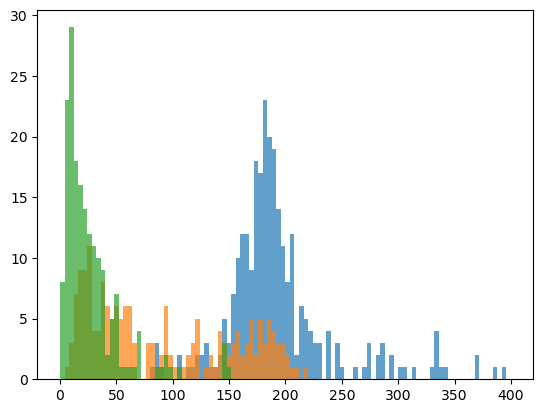

In [ ]:
from importlib import import_module
import os
import sys
import argparse
import linecache
import uproot
import vector
import math
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak



sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

pdgid = events["LHEPart_pdgId"].array()
toptagger = events["FatJet_particleNetWithMass_TvsQCD"].array()
fatjetmass = events["FatJet_mass"].array()
fatjetpt = events["FatJet_pt"].array()
jetmass = events["Jet_mass"].array()
jeteta = events["Jet_eta"].array()
FatJet_eta = events["FatJet_eta"].array()
jetpt = events["Jet_pt"].array()
btagger = events["Jet_btagPNetB"].array()
topjetmask = (toptagger > 0.9) 
## top jet 은 pt cut 해도 변화 없음 

botjetmask = (btagger > 0.7) 

botjetmass = jetmass[botjetmask]


# 이벤트별로 botjetmass가 2개 이상인 경우 첫 번째와 두 번째 값을 따로 저장
botjetmass = botjetmass[ak.num(botjetmass) > 1]
botjetmass1 = botjetmass[:, 0]  # 첫 번째 b jet mass만 선택
botjetmass2 = botjetmass[:, 1]  # 두 번째 b jet mass만 선택
print("bot jet mass 1", botjetmass1)
print("bot jet mass 2", botjetmass2)

print("bot jet num",len(botjetmass))


topjetmass = fatjetmass[topjetmask]
print(topjetmass)
topjetmass = ak.flatten(topjetmass)  
print("top jet mass num",len(topjetmass))


plt.hist(topjetmass, bins=100, range=(0, 400), alpha=0.7, label='Top Jet Mass')
plt.hist(botjetmass1, bins=100, range=(0, 400), alpha=0.7, label='b1 Jet Mass')
plt.hist(botjetmass2, bins=100, range=(0, 400), alpha=0.7, label='b2 Jet Mass')





## second WR* reco

Number of b-jets: 182
Number of top jets: 275
Number of b jets: 182
Valid events: 119
[ 482.31897498  437.12392402  415.04212797  356.04250711  409.39590955
  325.03329986  310.02070166  272.40801224  387.82900235  407.87670648
 1243.89109259  256.95907038  321.654354    431.5734895   517.63363184
  361.72607954 1975.70294203  470.89750709  930.7158296   518.00854127
  799.75475384 1485.91176248  288.89927499 1267.83716209  278.7094489
  788.30236385  336.34915494  355.4501997   746.01381008  410.0770429
  744.02706338  390.04673955  383.06096884  304.53211102  264.1973213
  628.13012903  277.38400146  360.73762439 1042.12401098  579.63593163
  812.00990665 1699.39269409  788.284611    341.59644711  268.34968701
 2445.88924903 1125.39633943  296.73632907 1534.74191168  333.50355688
  749.60474459  279.87191953  331.30552704  445.48915786 1933.51886391
 1682.60571684  268.98909528  326.7615352  1435.09707591  240.19037075
  500.35688159  344.82241686 1723.90359405  245.00676127  365.824

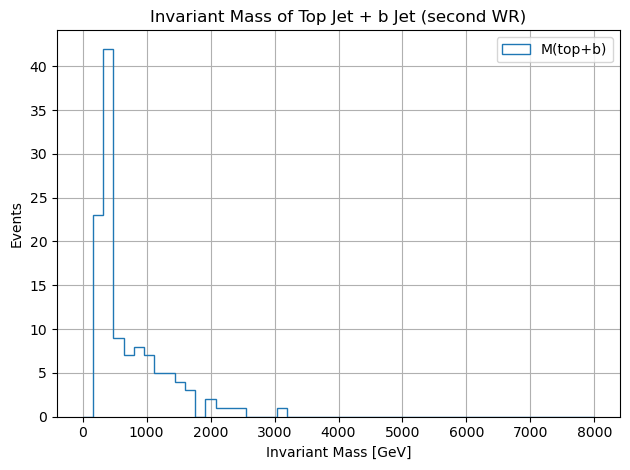

In [13]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

vector.register_awkward()  # 중요: vector 연산 활성화

# Load file
sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()

# Load variables
top_score = events["FatJet_particleNetWithMass_TvsQCD"].array()
top_pt = events["FatJet_pt"].array()
top_eta = events["FatJet_eta"].array()
top_phi = events["FatJet_phi"].array()
top_mass = events["FatJet_mass"].array()

b_score = events["Jet_btagPNetB"].array()
b_pt = events["Jet_pt"].array()
b_eta = events["Jet_eta"].array()
b_phi = events["Jet_phi"].array()
b_mass = events["Jet_mass"].array()



# Define masks
top_mask = (top_score > 0.9) 
b_mask = (b_score > 0.7)



# Apply masks
top_pt = top_pt[top_mask]
top_eta = top_eta[top_mask]
top_phi = top_phi[top_mask]
top_mass = top_mass[top_mask]


b_pt = b_pt[b_mask]
b_eta = b_eta[b_mask]
b_phi = b_phi[b_mask]
b_mass = b_mass[b_mask]
bscore = (ak.num(b_pt) >= 2)  
print("Number of b-jets:", ak.sum(bscore))  ## bjet 0.7 이상인 b-jet의 갯수
# 여러개의 b 중에서 
#real_b_mask = (b_pt > 30) 

#b_pt = b_pt[real_b_mask]
#b_eta = b_eta[real_b_mask]
#b_phi = b_phi[real_b_mask]
#b_mass = b_mass[real_b_mask]


t= (ak.num(top_pt) ==1)
print("Number of top jets:", ak.sum(t)) # t-jet 0.9 이상인 top-jet의 갯수
b = (ak.num(b_pt) >= 2)
print("Number of b jets:", ak.sum(b))

# 필터: 이벤트당 최소 1개 top-jet, 2개 b-jet 있어야 함
valid_events = (ak.num(top_pt) > 0) & (ak.num(b_pt) > 1)
print("Valid events:", ak.sum(valid_events))

# valid event만 유지 (똑같은 필터 사용해줘야지 갯수가 같아서 합칠 수 있음)
top_pt = top_pt[valid_events]
top_eta = top_eta[valid_events]
top_phi = top_phi[valid_events]
top_mass = top_mass[valid_events]

b_pt = b_pt[valid_events]
b_eta = b_eta[valid_events]
b_phi = b_phi[valid_events]
b_mass = b_mass[valid_events]



# 벡터 구성 (이벤트당 leading jet 사용)
topjet = vector.array({
    "pt": top_pt[:, 0],
    "eta": top_eta[:, 0],
    "phi": top_phi[:, 0],
    "mass": top_mass[:, 0],
})

bjet = vector.array({
    "pt": b_pt[:, 0],
    "eta": b_eta[:, 0],
    "phi": b_phi[:, 0],
    "mass": b_mass[:, 0],
})


# 계산
m_tb = (topjet + bjet).mass
print( m_tb)
# 플로팅
plt.hist(ak.to_numpy(m_tb), bins=50, range=(0, 8000), histtype='step', label='M(top+b)')
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass of Top Jet + b Jet (second WR)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## including lepton 

1840
Number of muons: 500
[[1.51e+03, 1.08e+03, 5.27, 5.18], [1.17e+03, 366, 8.43], ..., [...], [791]]
Number of electrons: 123
[[9.96], [], [63.2], [480], [115], ..., [17.8], [], [74.6], [], [9.57, 6.96]]
[[1.17e+03, 366, 8.43], [1.56e+03, 519, 103, 10.7], ..., [...], [660, 219]]
survived WR num: 117


Text(0.5, 1.0, 'Invariant Mass of WR')

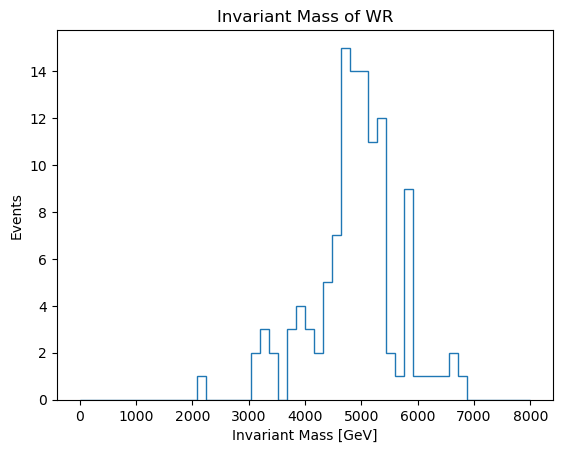

In [28]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

vector.register_awkward()  # 중요: vector 연산 활성화

# Load file
sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]
keys = events.keys()
print(len(events))
# Load variables
top_score = events["FatJet_particleNetWithMass_TvsQCD"].array()
top_pt = events["FatJet_pt"].array()
top_eta = events["FatJet_eta"].array()
top_phi = events["FatJet_phi"].array()
top_mass = events["FatJet_mass"].array()

b_score = events["Jet_btagPNetB"].array()
b_pt = events["Jet_pt"].array()
b_eta = events["Jet_eta"].array()
b_phi = events["Jet_phi"].array()
b_mass = events["Jet_mass"].array()

muon_pt = events["Muon_pt"].array()
muon_eta = events["Muon_eta"].array()
muon_phi = events["Muon_phi"].array()
muon_mass = events["Muon_mass"].array()
print("Number of muons:", ak.sum(ak.num(muon_pt) > 0))  # muon이 있는 이벤트의 갯수
print(muon_pt)
electron_pt = events["Electron_pt"].array()
electron_eta = events["Electron_eta"].array()
electron_phi = events["Electron_phi"].array()
electron_mass = events["Electron_mass"].array()
print("Number of electrons:", ak.sum(ak.num(electron_pt) > 1))  # electron이 있는 이벤트의 갯수
print(electron_pt)

# Define masks
top_mask = (top_score > 0.9) 
b_mask = (b_score > 0.7)



# Apply masks
top_pt = top_pt[top_mask]
top_eta = top_eta[top_mask]
top_phi = top_phi[top_mask]
top_mass = top_mass[top_mask]


b_pt = b_pt[b_mask]
b_eta = b_eta[b_mask]
b_phi = b_phi[b_mask]
b_mass = b_mass[b_mask]
bscore = (ak.num(b_pt) >= 2)  



# 여러개의 b 중에서 
#real_b_mask = (b_pt > 30) 

#b_pt = b_pt[real_b_mask]
#b_eta = b_eta[real_b_mask]
#b_phi = b_phi[real_b_mask]
#b_mass = b_mass[real_b_mask]


t= (ak.num(top_pt) ==1)

b = (ak.num(b_pt) >= 2)


# 필터: 이벤트당 최소 1개 top-jet, 2개 b-jet 있어야 함
#valid_events_el = (((ak.num(top_pt) > 0) & (ak.num(b_pt) > 1)) & ( (ak.num(electron_pt) > 1))) # 가짜 muon 일 수 도 있음 electron 이벤트인데 뮤온 2개있는거 잡아서 쓸 수 있음
valid_events = (((ak.num(top_pt) > 0) & (ak.num(b_pt) > 1)) & ( (ak.num(muon_pt) > 1))) # 가짜 electron 일 수 도 있음 muon 이벤트인데 일렉트론 2개있는거 잡아서 쓸 수 있음

## muon case

# valid event만 유지 (똑같은 필터 사용해줘야지 갯수가 같아서 합칠 수 있음)
top_pt = top_pt[valid_events]
top_eta = top_eta[valid_events]
top_phi = top_phi[valid_events]
top_mass = top_mass[valid_events]

b_pt = b_pt[valid_events]
b_eta = b_eta[valid_events]
b_phi = b_phi[valid_events]
b_mass = b_mass[valid_events]

#electron_pt = electron_pt[valid_events]
#electron_eta = electron_eta[valid_events]
#electron_phi = electron_phi[valid_events]
#electron_mass = electron_mass[valid_events]

muon_pt = muon_pt[valid_events]
muon_eta = muon_eta[valid_events]
muon_phi = muon_phi[valid_events]
muon_mass = muon_mass[valid_events]
print(muon_pt)


# 벡터 구성 (이벤트당 leading jet 사용)
topjet = vector.array({
    "pt": top_pt[:, 0],
    "eta": top_eta[:, 0],
    "phi": top_phi[:, 0],
    "mass": top_mass[:, 0],
})

bjet = vector.array({
    "pt": b_pt[:, 0],
    "eta": b_eta[:, 0],
    "phi": b_phi[:, 0],
    "mass": b_mass[:, 0],
})

leading_muon = vector.array({
    "pt": muon_pt[:, 0],
    "eta": muon_eta[:, 0],
    "phi": muon_phi[:, 0],
    "mass": muon_mass[:, 0],
})
#leading_electron = vector.array({
#    "pt": electron_pt[:, 0],
#    "eta": electron_eta[:, 0],
#    "phi": electron_phi[:, 0],
#    "mass": electron_mass[:, 0],
#})

subleading_muon = vector.array({
    "pt": muon_pt[:, 1],
    "eta": muon_eta[:, 1],
    "phi": muon_phi[:, 1],
    "mass": muon_mass[:, 1],
})
#subleading_electron = vector.array({
#    "pt": electron_pt[:, 1],
#    "eta": electron_eta[:, 1],
#    "phi": electron_phi[:, 1],
#    "mass": electron_mass[:, 1],
#})

# 계산
m_tb = (topjet + bjet + leading_muon + subleading_muon ).mass
print("survived WR num:",len(m_tb))
# 플로팅
plt.hist(ak.to_numpy(m_tb), bins=50, range=(0, 8000), histtype='step', label='M(top+b)')
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass of WR")


## all of file WR reco

In [ ]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt
import glob
from tqdm import tqdm  # ✅ 진행률 표시

vector.register_awkward()

# 모든 .root 파일 경로 가져오기
path = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/"
file_list = sorted(glob.glob(path + "*.root"))

# 누적 리스트
all_mtb = []
total_wr = []
m_n1_list = []
m_n2_list = []

# tqdm으로 파일 리스트 순회
for sample in tqdm(file_list, desc="Processing ROOT files"):
    file = uproot.open(sample)
    events = file["Events"]

    top_score = events["FatJet_particleNetWithMass_TvsQCD"].array()
    top_pt = events["FatJet_pt"].array()
    top_eta = events["FatJet_eta"].array()
    top_phi = events["FatJet_phi"].array()
    top_mass = events["FatJet_mass"].array()

    b_score = events["Jet_btagPNetB"].array()
    b_pt = events["Jet_pt"].array()
    b_eta = events["Jet_eta"].array()
    b_phi = events["Jet_phi"].array()
    b_mass = events["Jet_mass"].array()

    # Masks
    top_mask = (top_score > 0.9)
    b_mask = (b_score > 0.9)

    # Apply masks
    top_pt = top_pt[top_mask]
    top_eta = top_eta[top_mask]
    top_phi = top_phi[top_mask]
    top_mass = top_mass[top_mask]

    b_pt = b_pt[b_mask]
    b_eta = b_eta[b_mask]
    b_phi = b_phi[b_mask]
    b_mass = b_mass[b_mask]

    # b jet filter: only realistic ones
    real_b_mask = (b_mass < 100)
    b_pt = b_pt[real_b_mask]
    b_eta = b_eta[real_b_mask]
    b_phi = b_phi[real_b_mask]
    b_mass = b_mass[real_b_mask]

    mu_pt = events["Muon_pt"].array()
    mu_eta = events["Muon_eta"].array()
    mu_phi = events["Muon_phi"].array()
    mu_mass = events["Muon_mass"].array()

    # 이벤트당 최소 2개의 뮤온이 있는지 확인
    
    # Event-level filtering
    valid_events = (ak.num(top_pt) > 0) & (ak.num(b_pt) > 1) & (ak.num(mu_pt) >= 2)

    top_pt = top_pt[valid_events]
    top_eta = top_eta[valid_events]
    top_phi = top_phi[valid_events]
    top_mass = top_mass[valid_events]

    b_pt = b_pt[valid_events]
    b_eta = b_eta[valid_events]
    b_phi = b_phi[valid_events]
    b_mass = b_mass[valid_events]

    mu_pt = mu_pt[valid_events]
    mu_eta = mu_eta[valid_events]
    mu_phi = mu_phi[valid_events]
    mu_mass = mu_mass[valid_events]

    if len(top_pt) == 0 or len(b_pt) == 0:
        continue

    topjet = vector.array({
        "pt": top_pt[:, 0],
        "eta": top_eta[:, 0],
        "phi": top_phi[:, 0],
        "mass": top_mass[:, 0],
    })

    bjet = vector.array({
        "pt": b_pt[:, 0],
        "eta": b_eta[:, 0],
        "phi": b_phi[:, 0],
        "mass": b_mass[:, 0],
    })

    lead_mu = vector.array({
        "pt": mu_pt[:, 0],
        "eta": mu_eta[:, 0],
        "phi": mu_phi[:, 0],
        "mass": mu_mass[:, 0],
    })
    sublead_mu = vector.array({
        "pt": mu_pt[:, 1],
        "eta": mu_eta[:, 1],
        "phi": mu_phi[:, 1],
        "mass": mu_mass[:, 1], 
    })

    m_tb = (topjet + bjet).mass
    m_wr = (topjet + bjet + lead_mu + sublead_mu).mass
    m_n1 = (topjet + bjet +lead_mu).mass
    m_n2 = (topjet + bjet + sublead_mu).mass
    all_mtb.append(m_tb)
    total_wr.append(m_wr)
    m_n1_list.append(m_n1)
    m_n2_list.append(m_n2)

# 병합
all_mtb = ak.concatenate(all_mtb)
all_wr = ak.concatenate(total_wr)
m_n1_list = ak.concatenate(m_n1_list)
m_n2_list = ak.concatenate(m_n2_list)
# 히스토그램
plt.hist(ak.to_numpy(all_wr), bins=1000, range=(0, 8000), histtype='step', label='M(top+b+2mu)')
plt.hist(ak.to_numpy(all_mtb), bins=1000, range=(0, 8000), histtype='step', label='M(top+b)')
plt.xlabel("Invariant Mass [GeV]")
plt.ylabel("Events")
plt.title("Invariant Mass of Top Jet + b Jet (all files combined)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## m(ll)

In [ ]:
import uproot
import vector
import awkward as ak
import numpy as np
import matplotlib.pyplot as plt

# 파일 로드
sample = "/data6/Users/snuintern1/LRSM_tb_channel/SAMPLEPRODUCTION/WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-4900_13p6TeV/Run3Summer22NanoAODv12_WRtoNMutoMuMuTB-HadTop_MWR-5000_MN-2500_13p6TeV_1.root"
file = uproot.open(sample)
events = file["Events"]


mass_sum  = (lead_mu + sublead_mu).mass
plt.hist(ak.to_numpy(mass_sum), bins=1000, range=(0, 8000), histtype='step', label='M(lead + sublead muon)')
